In [26]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None

In [27]:
# read the dataset into df
df = pd.read_csv('fifa.csv')

In [28]:
# clean the data by deleting the columns not required for the project
del df["player_url"]
del df["sofifa_id"]
del df["dob"]
del df["height_cm"]
del df["weight_kg"]
del df["international_reputation"]
del df["body_type"]
del df["real_face"]
del df["team_jersey_number"]
del df["loaned_from"]
del df["joined"]
del df["contract_valid_until"]
del df["nation_jersey_number"]
del df["defending_marking"]
del df["ls"]
del df["rs"]
del df["lw"]
del df["lf"]
del df["st"]
del df["cf"]
del df["rf"]
del df["rw"]
del df["lam"]
del df["cam"]
del df["ram"]
del df["lm"]
del df["lcm"]
del df["cm"]
del df["rcm"]
del df["rm"]
del df["lwb"]
del df["ldm"]
del df["cdm"]
del df["rdm"]
del df["rwb"]
del df["lb"]
del df["lcb"]
del df["cb"]
del df["rcb"]
del df["long_name"]
del df["league_rank"]
del df["preferred_foot"]
del df["weak_foot"]
del df["skill_moves"]
del df["player_tags"]
del df["player_traits"]
del df["rb"]
del df["team_position"]
del df["nation_position"]
del df["league_name"]
del df["goalkeeping_handling"]
del df["goalkeeping_reflexes"]
del df["goalkeeping_positioning"]
del df["goalkeeping_diving"]
del df["goalkeeping_kicking"]

# print first five records of the dataset
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
2,J. Oblak,27,Slovenia,Atlético Madrid,91,93,75000000,125000,GK,Medium/Medium,...,78,12,34,19,11,65,11,68,12,18
3,R. Lewandowski,31,Poland,FC Bayern München,91,91,80000000,240000,ST,High/Medium,...,86,85,81,49,94,79,88,88,42,19
4,Neymar Jr,28,Brazil,Paris Saint-Germain,91,91,90000000,270000,"LW, CAM",High/Medium,...,50,84,51,36,87,90,92,93,30,29


In [29]:
# 4. STRIKERS

df_fw = df.loc[df['player_positions'].str.contains("ST", case = True)]
df_fw_2 = df.loc[df['player_positions'].str.contains("CF", case = True)]

df_fw = pd.concat([df_fw, df_fw_2])
df_fw.sort_values(by=['potential'], inplace=True, ascending=False)

df_fw = df_fw.reset_index(drop = True)

df_fw

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,K. Mbappé,21,France,Paris Saint-Germain,90,95,105500000,160000,"ST, LW, RW",High/Low,...,76,79,62,38,91,80,70,84,34,32
1,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
2,João Félix,20,Portugal,Atlético Madrid,81,93,32000000,51000,"CF, ST",Medium/Medium,...,64,81,69,38,84,78,68,82,42,35
3,K. Havertz,21,Germany,Chelsea,85,93,57000000,105000,"CAM, RM, CF",Medium/Medium,...,69,78,42,38,84,82,73,84,46,38
4,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,M. Rennie,26,Scotland,St. Patrick's Athletic,52,55,60000,550,ST,Medium/Medium,...,69,54,32,13,51,46,52,40,17,19
3726,S. Fenwick,30,England,Cork City,55,55,80000,700,ST,High/Medium,...,76,51,66,14,56,51,57,54,15,11
3727,C. Silva,26,Uruguay,Centro Atlético Fénix,51,54,45000,500,ST,Medium/Medium,...,43,46,54,22,47,41,55,43,19,19
3728,J. Serrant-Green,26,England,Finn Harps,51,54,45000,500,ST,Medium/Medium,...,78,47,62,35,48,39,39,46,42,38


In [30]:
# delete the duplicates
df_fw.drop_duplicates(keep = 'first', inplace = True)
df_fw = df_fw.reset_index(drop=True)

df_fw

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,K. Mbappé,21,France,Paris Saint-Germain,90,95,105500000,160000,"ST, LW, RW",High/Low,...,76,79,62,38,91,80,70,84,34,32
1,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
2,João Félix,20,Portugal,Atlético Madrid,81,93,32000000,51000,"CF, ST",Medium/Medium,...,64,81,69,38,84,78,68,82,42,35
3,K. Havertz,21,Germany,Chelsea,85,93,57000000,105000,"CAM, RM, CF",Medium/Medium,...,69,78,42,38,84,82,73,84,46,38
4,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,M. Rennie,26,Scotland,St. Patrick's Athletic,52,55,60000,550,ST,Medium/Medium,...,69,54,32,13,51,46,52,40,17,19
3553,S. Fenwick,30,England,Cork City,55,55,80000,700,ST,High/Medium,...,76,51,66,14,56,51,57,54,15,11
3554,C. Silva,26,Uruguay,Centro Atlético Fénix,51,54,45000,500,ST,Medium/Medium,...,43,46,54,22,47,41,55,43,19,19
3555,J. Serrant-Green,26,England,Finn Harps,51,54,45000,500,ST,Medium/Medium,...,78,47,62,35,48,39,39,46,42,38


In [31]:
for i in range(0, len(df_fw['overall'])):
    if df_fw['overall'][i] > 85:
        df_fw = df_fw.drop(i)

df_fw = df_fw.reset_index(drop = True)

# remove irrelevant columns
df_fw = df_fw.drop(['defending_sliding_tackle', 'defending_standing_tackle', 'mentality_interceptions', 'skill_fk_accuracy', 'mentality_aggression', 'skill_long_passing', 'defending', 'nationality', 'club_name', 'age', 'value_eur', 'wage_eur', 'player_positions', 'release_clause_eur', 'work_rate', 'gk_reflexes', 'gk_positioning', 'gk_handling', 'gk_diving', 'gk_kicking', 'gk_speed'], axis = 1)

# for safekeeping keep the values in fw dataset
fw = df_fw

# get the top 10 rated strikers according to their potential
df_fw = df_fw[0:10]
df_fw

,short_name,overall,potential,pace,shooting,passing,dribbling,physic,attacking_crossing,attacking_finishing,...,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
0,João Félix,81,93,81.0,81.0,74.0,83.0,69.0,73,82,...,80,82,79,75,64,81,84,78,68,82
1,K. Havertz,85,93,84.0,81.0,79.0,85.0,67.0,73,85,...,74,74,75,82,69,78,84,82,73,84
2,E. Haaland,84,92,84.0,87.0,63.0,76.0,85.0,46,87,...,67,93,70,78,91,83,86,68,80,83
3,M. Rashford,85,91,91.0,83.0,78.0,86.0,78.0,77,83,...,75,90,72,87,76,81,82,82,81,82
4,L. Martínez,84,91,83.0,82.0,71.0,85.0,82.0,56,86,...,78,80,88,77,83,74,85,77,74,83
5,Ferran Torres,81,89,82.0,76.0,78.0,80.0,64.0,77,77,...,68,76,75,73,66,75,77,86,66,82
6,M. Greenwood,77,89,81.0,78.0,71.0,78.0,67.0,70,79,...,72,82,63,70,69,80,77,74,64,76
7,J. David,77,88,85.0,76.0,69.0,78.0,66.0,63,81,...,71,75,84,83,73,69,75,73,78,83
8,A. Martial,84,88,89.0,83.0,74.0,87.0,72.0,72,85,...,79,83,70,77,76,79,84,77,81,82
9,T. Werner,85,88,91.0,85.0,69.0,84.0,71.0,69,88,...,76,85,75,83,67,78,88,65,78,82


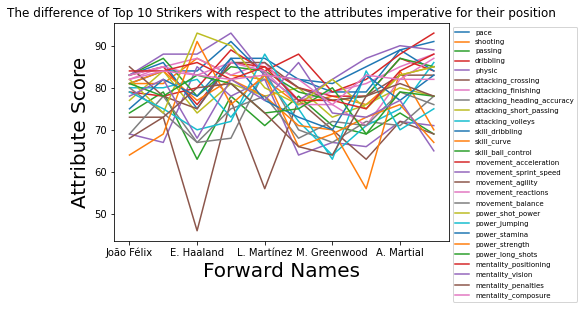

In [32]:
# plot the top 10 strikers with their most associated attributes

df_fw.plot(x = 'short_name', y = ['pace', 'shooting', 'passing', 'dribbling', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure'])
plt.xlabel('Forward Names', fontsize = 20)
plt.ylabel('Attribute Score', fontsize = 20)
plt.title("The difference of Top 10 Strikers with respect to the attributes imperative for their position")
plt.legend(bbox_to_anchor=(1, 1), fontsize = 7)
plt.show()

In [33]:
# get the strikers names in names
names_fw = []
names_fw = pd.DataFrame(fw['short_name'])
fw = fw.drop('short_name', axis = 1)
fw = fw.drop('potential', axis = 1)
names_fw.append(df_fw['short_name'])

fw_norm = (fw - fw.mean())/fw.std()

In [34]:
# use Linear Regression to predict the overall of strikers
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
fw_x = fw_norm.drop('overall', axis = 1)
fw_w = fw_norm['overall']

lm.fit(fw_x,fw_w)
yhat = lm.predict(fw_x)
print(lm.intercept_)
print(lm.coef_)

7.685163742608297e-16
[-0.07358533  0.0013416   0.04748816 -0.01663618  0.03688007  0.00794553
  0.15429708  0.06231621  0.09860151 -0.00171193  0.10934626 -0.00083241
  0.19344331  0.08703601  0.10597685 -0.00227611  0.12717438 -0.0122679
  0.11050575 -0.00686777  0.00681764  0.01985714  0.01136931  0.15277252
 -0.00500405 -0.01211036  0.04095681]


In [35]:
# get the actual and predicted table for strikers
avp = pd.DataFrame({'Actual' : fw_w, 'Predicted' : yhat})
df.sort_index(inplace = True)

add_names = avp.join(names_fw['short_name'])

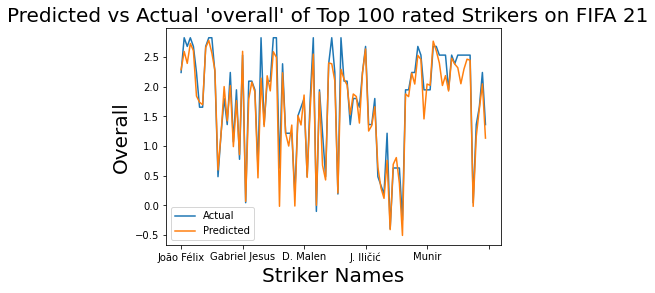

In [14]:
# plot the actual vs predicted of top 100 rated goalkeepers according
# to their potential

add_names[0:100].plot(x = 'short_name', y = ['Actual','Predicted'])
plt.figtext(.5, .9, "Predicted vs Actual 'overall' of Top 100 rated Strikers on FIFA 21", fontsize = 20, ha = 'center')
plt.xlabel('Striker Names', fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.show()

In [36]:
# get the error rate for linear regression
from sklearn import metrics
from math import sqrt
print('Mean Squared Error:', sqrt(metrics.mean_squared_error(fw_w, yhat)))
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(fw_w, yhat)))

Mean Squared Error: 0.1717221226119856
Accuracy: 0.8282778773880144


In [37]:
# accuracy for the top 500 strikers
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(fw_w[:500], yhat[:500])))

Accuracy: 0.8080115672890344
